In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Basic incidents details 2021 - 4326.csv')
df.head(3)

,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Ward_At_Event_Dispatch,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry
0,1,F21133379,FASS - Alarm Single Source,Emergency Fire,31 - Alarm Equipment - Malfunction,0,01 - 911,234.0,24,NaN,Overture Rd / Pilot St,2021-12-14T17:34:10,NaN,2021-12-14T17:43:21,0.0,"{'type': 'Point', 'coordinates': (-79.1989, 43..."
1,2,F21024771,CC - Check Call,Other Emergency Events,59 - Other Public Hazard,0,01 - 911,214.0,25,NaN,Morrish Rd / Willowlea Dr,2021-03-19T23:40:42,2021-03-19T23:47:46,2021-03-19T23:56:16,0.0,"{'type': 'Point', 'coordinates': (-79.1763, 43..."
2,3,F21132262,CCNE - Check Call - Non Emergency,Non Emergency,59 - Other Public Hazard,0,01 - 911,131.0,15,NaN,Rochester Ave / St Ives Cres,2021-12-11T22:58:23,2021-12-11T23:06:03,NaN,0.0,"{'type': 'Point', 'coordinates': (-79.3899, 43..."


In [3]:
# Count missing values for each column.
missing_values = df.isnull().sum()
print(missing_values)

_id                                 0
INCIDENT_NUMBER                     0
Initial_CAD_Event_Type              0
Initial_CAD_Event_Call_Type         0
Final_Incident_Type                 7
Event_Alarm_Level                   0
Call_Source                        11
Incident_Station_Area               2
Incident_Ward                       0
Ward_At_Event_Dispatch         134538
Intersection                        0
TFS_Alarm_Time                      0
TFS_Arrival_Time                 4213
Last_TFS_Unit_Clear_Time          316
Persons_Rescued                    23
geometry                            0
dtype: int64


In [4]:
# Drop column that has all null values.
df.drop('Ward_At_Event_Dispatch',axis=1,inplace=True)

In [5]:
# Convert time data to datetime format.
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'])
df['TFS_Arrival_Time'] = pd.to_datetime(df['TFS_Arrival_Time'])
df['Last_TFS_Unit_Clear_Time'] = pd.to_datetime(df['Last_TFS_Unit_Clear_Time'])

In [6]:
# Fill null datetime data with average of entire column.
df['TFS_Arrival_Time'].fillna(df['TFS_Arrival_Time'].mean(),inplace=True)
df['Last_TFS_Unit_Clear_Time'].fillna(df['Last_TFS_Unit_Clear_Time'].mean(),inplace=True)

In [7]:
# Display all rows that have a null value in them.
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry
10542,10543,F21030331,FIG - Fire - Grass/Rubbish,Emergency Fire,-,0,01 - 911,125.0,15,St Cuthberts Rd / Berney Cres,2021-04-04 16:59:31,2021-04-04 17:08:13.000000000,2021-04-04 17:14:17,NaN,"{'type': 'Point', 'coordinates': (-79.3716, 43..."
17592,17593,F21040521,Medical,Medical,NaN,0,NaN,241.0,22,M1W,2021-05-01 11:05:25,2021-07-11 06:40:09.032947968,2021-05-01 11:09:21,NaN,"{'type': 'Point', 'coordinates': (0.0, 0.0)}"
18670,18671,F21138135,Medical,Medical,-,0,03 - From Ambulance,426.0,4,M6K,2021-12-26 07:21:49,2021-12-26 07:25:41.000000000,2021-12-26 08:02:41,NaN,"{'type': 'Point', 'coordinates': (0.0, 0.0)}"
23618,23619,F21064847,Medical,Medical,-,0,NaN,227.0,19,M4M,2021-07-01 22:37:53,2021-07-01 22:38:42.000000000,2021-07-01 22:53:27,NaN,"{'type': 'Point', 'coordinates': (0.0, 0.0)}"
23822,23823,F21064613,Medical,Medical,-,0,03 - From Ambulance,426.0,4,M6R,2021-07-01 11:21:00,2021-07-01 11:24:07.000000000,2021-07-01 11:24:56,NaN,"{'type': 'Point', 'coordinates': (0.0, 0.0)}"
30735,30736,F21083594,CC - Check Call,Other Emergency Events,NaN,0,NaN,332.0,13,Yonge St / Melinda St / Colborne St,2021-08-16 20:21:59,2021-08-16 20:22:46.000000000,2021-08-16 20:24:01,NaN,"{'type': 'Point', 'coordinates': (-79.3776, 43..."
36777,36778,F21140135,Medical,Medical,-,0,08 - Two-Way Radio (Fire Department),434.0,3,M8W,2021-12-31 07:01:34,2021-12-31 07:02:14.000000000,2021-12-31 07:14:10,NaN,"{'type': 'Point', 'coordinates': (0.0, 0.0)}"
41921,41922,F21101616,Medical,Medical,-,0,03 - From Ambulance,244.0,22,M1T,2021-09-27 16:33:05,2021-09-27 16:38:03.000000000,2021-09-27 16:43:48,NaN,"{'type': 'Point', 'coordinates': (0.0, 0.0)}"
43695,43696,F21009652,Medical,Medical,Medical,0,03 - From Ambulance,NaN,20,M1J,2021-02-01 13:04:57,2021-02-01 13:10:46.000000000,2021-02-01 13:46:08,0.0,"{'type': 'Point', 'coordinates': (0.0, 0.0)}"
46970,46971,F21051740,Medical,Medical,-,0,03 - From Ambulance,426.0,4,M6K,2021-05-30 08:33:41,2021-05-30 08:38:11.000000000,2021-05-30 08:55:17,NaN,"{'type': 'Point', 'coordinates': (0.0, 0.0)}"


In [8]:
# All rows with a null value have an Event_Alarm_Level of 0, therefore it is safe to drop all these rows.
df.dropna(inplace=True)

In [9]:
# Create new columns where TFS_Alarm_Time is further divided into Hour, Month, and Day of Week.
df['Hour'] = df['TFS_Alarm_Time'].apply(lambda time: time.hour)
df['Month'] = df['TFS_Alarm_Time'].apply(lambda time: time.month)
df['Day of Week'] = df['TFS_Alarm_Time'].apply(lambda time: time.dayofweek)

In [10]:
df.head(3)

,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry,Hour,Month,Day of Week
0,1,F21133379,FASS - Alarm Single Source,Emergency Fire,31 - Alarm Equipment - Malfunction,0,01 - 911,234.0,24,Overture Rd / Pilot St,2021-12-14 17:34:10,2021-07-11 06:40:09.032947968,2021-12-14 17:43:21.000000000,0.0,"{'type': 'Point', 'coordinates': (-79.1989, 43...",17,12,1
1,2,F21024771,CC - Check Call,Other Emergency Events,59 - Other Public Hazard,0,01 - 911,214.0,25,Morrish Rd / Willowlea Dr,2021-03-19 23:40:42,2021-03-19 23:47:46.000000000,2021-03-19 23:56:16.000000000,0.0,"{'type': 'Point', 'coordinates': (-79.1763, 43...",23,3,4
2,3,F21132262,CCNE - Check Call - Non Emergency,Non Emergency,59 - Other Public Hazard,0,01 - 911,131.0,15,Rochester Ave / St Ives Cres,2021-12-11 22:58:23,2021-12-11 23:06:03.000000000,2021-07-11 06:38:38.161404416,0.0,"{'type': 'Point', 'coordinates': (-79.3899, 43...",22,12,5


In [11]:
# Replace integer value for day of week with their respective three letter abbreviations.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [13]:
# Create a new database called dayHour which tells you number of incidents. 
dayHour = df.groupby(by=['Day of Week','Hour']).count()['TFS_Alarm_Time'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,647,540,487,430,353,436,538,626,755,926,...,1030,1080,1142,1211,1130,1094,1093,1039,922,808
Mon,592,515,455,377,371,371,465,581,717,837,...,1053,973,1026,1039,1016,1012,924,891,811,679
Sat,711,644,569,519,430,429,400,516,678,750,...,1006,1104,1065,1067,1057,1169,1006,1011,954,799
Sun,706,717,576,507,446,456,482,528,590,709,...,926,892,961,994,1012,1025,934,897,778,715
Thu,601,514,421,405,334,373,462,543,772,880,...,1078,1054,1038,1101,1150,1015,979,961,906,778
Tue,567,469,434,382,392,344,452,547,765,849,...,1032,1150,1058,1078,1026,983,929,946,766,732
Wed,590,512,436,411,376,369,449,525,769,875,...,1077,1022,1068,1094,1082,1042,951,930,834,638


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

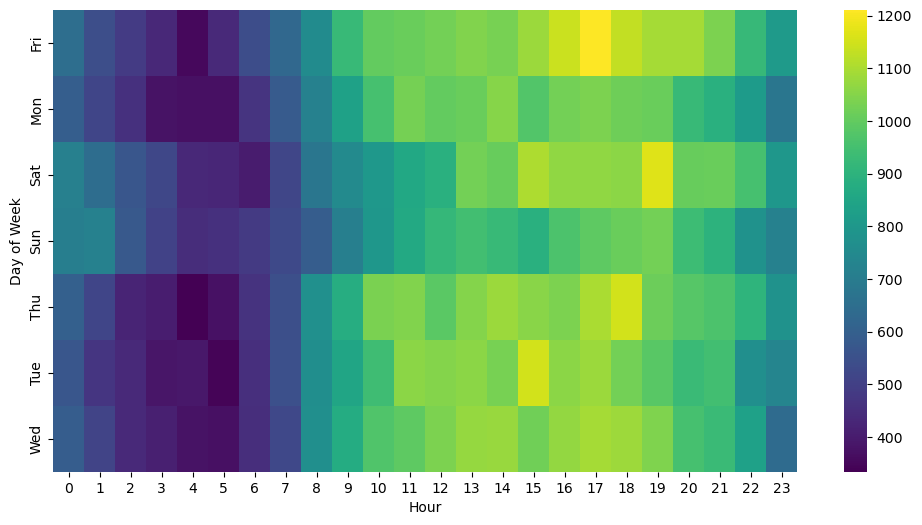

In [14]:
# Create a heatmap for incident frequency by day and hour.
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [15]:
# Reorder the rows in dayHour based on the proper order of days in the week.
dayOrder = ['Sun', 'Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon']
dayHour = dayHour.reindex(dayOrder)

<AxesSubplot:title={'center':'Incident Frequency by Day of the Week and Hour'}, xlabel='Hour', ylabel='Day of Week'>

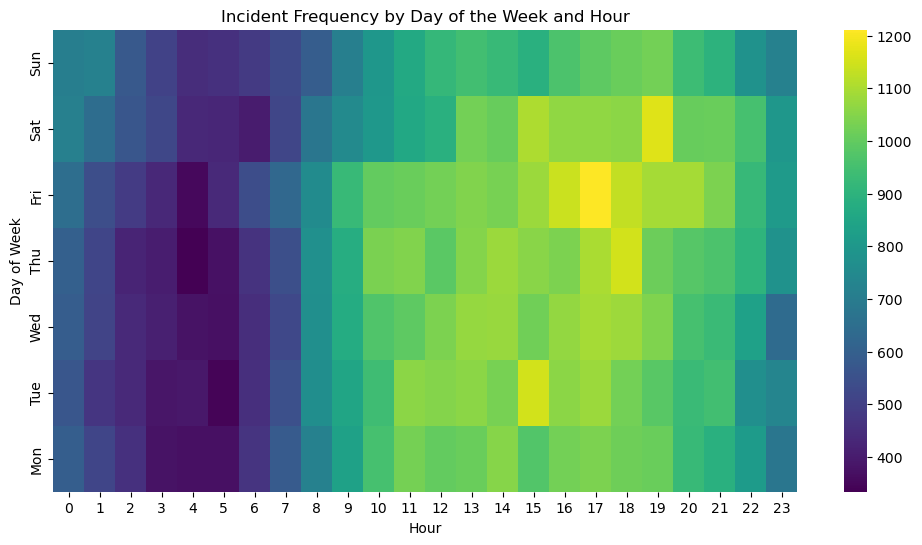

In [35]:
# Plot the heatmap with the desired order of days on the y-axis.
plt.figure(figsize=(12, 6))
plt.title('Incident Frequency by Day of the Week and Hour')
sns.heatmap(dayHour, cmap='viridis', yticklabels=dayOrder)

In [17]:
# Replace integer value for month with their respective three letter abbreviations.
dmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Month'] = df['Month'].map(dmap)

In [18]:
# Create a new database called dayMonth which tells you number of incidents.
dayMonth = df.groupby(by=['Day of Week','Month']).count()['TFS_Alarm_Time'].unstack()
dayMonth

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Day of Week,,,,,,,,,,,,
Fri,1898,1778,2120,1335,1597,2034,1492,1323,1562,1493,2055,1679
Mon,1403,1923,1527,1258,1127,1580,1576,1587,1911,1843,1463,1500
Sat,1441,1722,1836,1243,1494,1856,1555,1299,1864,1535,1997,1621
Sun,1343,2073,1392,1200,1347,1529,1522,1254,1757,1504,1971,1483
Thu,1843,1730,2143,1215,1196,1835,1531,1323,1497,1445,1649,2072
Tue,1411,2016,1533,1232,1207,1565,1969,1715,1363,1900,1546,1550
Wed,1504,1641,1951,1204,1215,1500,1877,1719,1410,1489,1541,2073


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

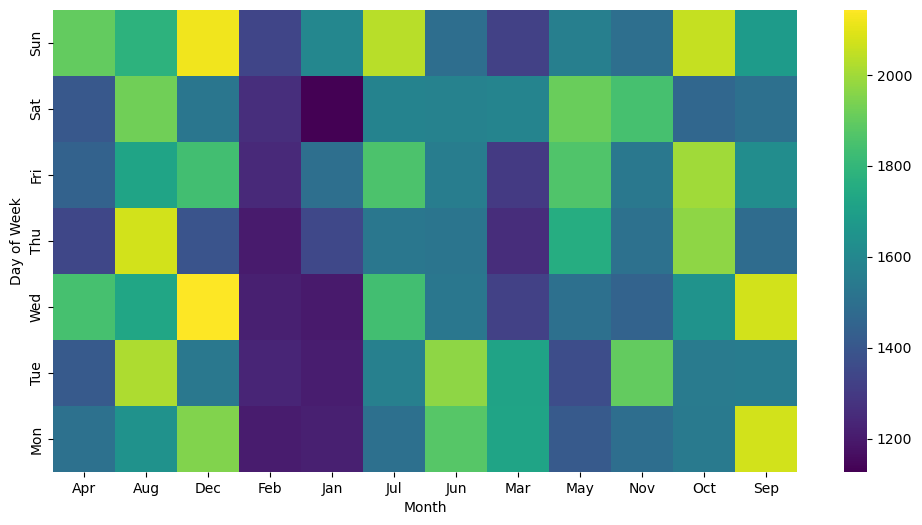

In [27]:
# Create a heatmap for incident frequency by day and month.
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis',yticklabels=dayOrder)

In [24]:
# Reorder the columns in dayMonth based on the proper order of months.
monthOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dayMonth = dayMonth.reindex(columns=monthOrder)

<AxesSubplot:title={'center':'Incident Frequency by Day of the Week and Month'}, xlabel='Month', ylabel='Day of Week'>

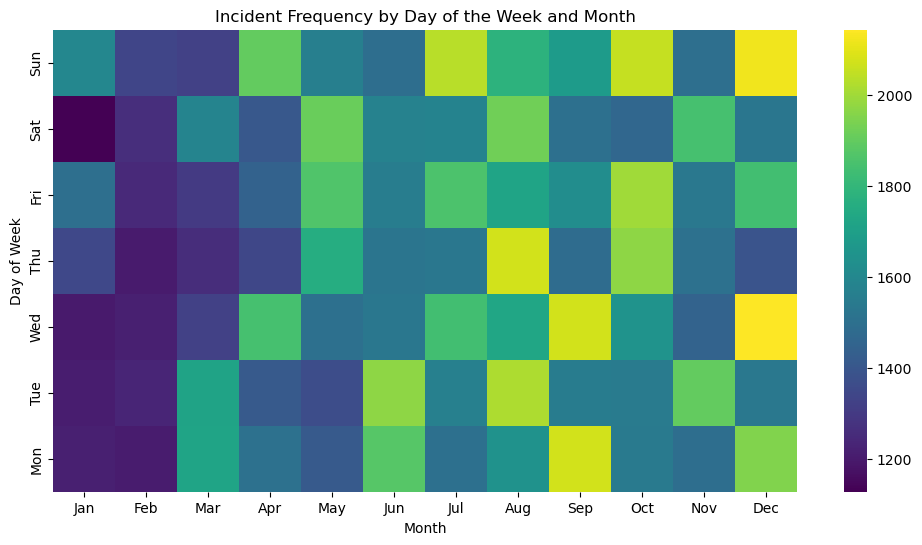

In [34]:
# Plot the heatmap with the desired order of months on the x-axis.
plt.figure(figsize=(12,6))
plt.title('Incident Frequency by Day of the Week and Month')
sns.heatmap(dayMonth, cmap='viridis', yticklabels=dayOrder)

In [37]:
# During what day of the week and hour of the day were the most incidents?
max_incidents_hour = dayHour.stack().idxmax()
print(f"Day and hour with the most incidents: {max_incidents_hour}")

# During what day of the week and which month were the most incidents?
max_incidents_month = dayMonth.stack().idxmax()
print(f"Day and month with the most incidents: {max_incidents_month}")

Day and hour with the most incidents: ('Fri', 17)
Day and month with the most incidents: ('Thu', 'Dec')


In [39]:
# Some insights:
# As expected, TFS incidents between the hours of 12AM and 6AM were consistently low on all days of the week in 2021.
# TFS incidents had the most number of occurrences between the hours of 1PM and 9PM during all days of the week.
# Jan and Feb in 2021 had less incidents compared to other months. This may be attributed to pandemic restrictions.
# Fridays at 5PM were the busiest times during the week.
# Wednesdays and Thursdays in December were the busiest times during the year.